In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# PV

Importo i profili del fotovoltaico

In [2]:
pv_profiles = pd.read_csv('Profili/Profili_PV.csv', sep=';').set_index('Scenari')
pv_profiles = pv_profiles.astype(np.float64)

Rinomina le colonne in base ai timestamp

In [3]:
i = 1
for (column_name, _) in pv_profiles.iteritems():
    pv_profiles.rename(columns={column_name: str(i)}, inplace=True)
    i += 1

In [4]:
pv_profiles['Mean'] = pv_profiles.mean(axis=1)

In [5]:
pv_profiles.head()

1    2    3    4    5    6    7    8    9   10  ...   88   89   90  \
Scenari                                                    ...                  
1        0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
2        0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
3        0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
4        0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
5        0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   

          91   92   93   94   95   96        Mean  
Scenari                                            
1        0.0  0.0  0.0  0.0  0.0  0.0  202.806615  
2        0.0  0.0  0.0  0.0  0.0  0.0  197.820368  
3        0.0  0.0  0.0  0.0  0.0  0.0  200.510939  
4        0.0  0.0  0.0  0.0  0.0  0.0  204.710579  
5        0.0  0.0  0.0  0.0  0.0  0.0  197.256791  

[5 rows x 97 columns]

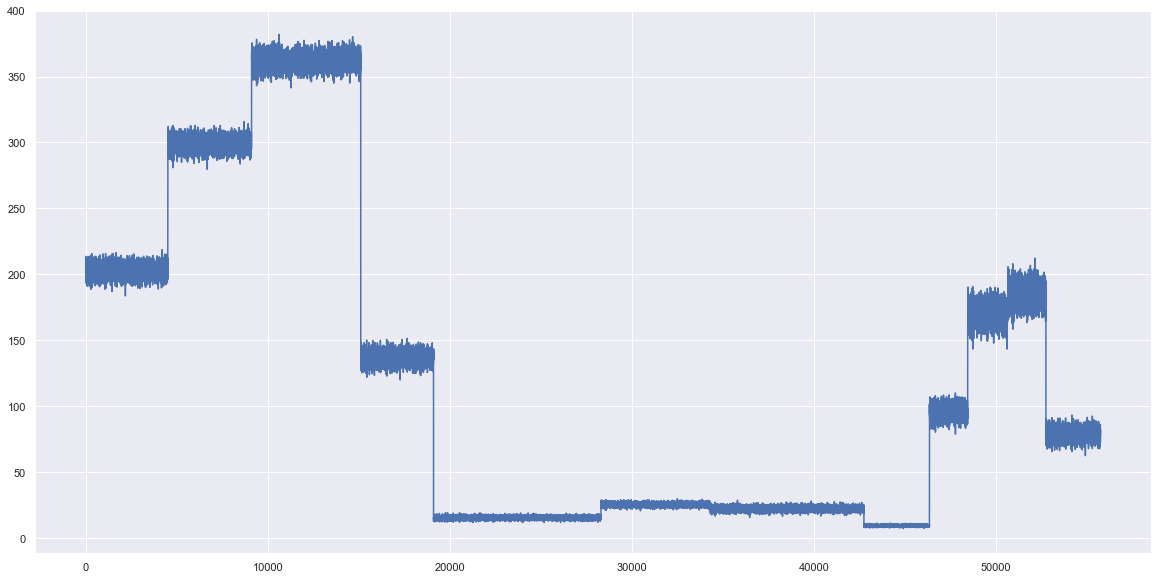

In [6]:
plt.figure(figsize=(20,10))
plt.plot(pv_profiles.Mean.to_numpy())
plt.savefig('pv_mean_graph.png')

In [7]:
for i, (index, row) in enumerate(pv_profiles.iterrows()):
    if i!= len(pv_profiles) - 1:
        if abs(row.at['Mean']-pv_profiles.iloc[i+1, :].at['Mean']) >40:
            print(i)

4499
9099
15099
19099
46349
48449
50897
52749


In questo modo ho trovato il modo in cui la media è distrubuita per i vari scenari. Si può ipotizzare che i dati dallo scenario 19100 a 46349 rappresentino un periodo invernale (ottobre, novembre, dicembre, gennaio, febbraio), in cui la produzione di fotovoltaico si abbassa drasticamente per via delle condizioni climatiche. Similmente, possiamo dire che gli scenari da 9100 a 15099 rappresentino il periodo estivo (agosto) in cui la produzione è massima. Il periodo che segue (15100-19099) rappresenterà quindi settembre e quello che precede (4500-9100) rappresenta luglio. Dallo scenario 1 allo scenario 4499 avremo giugno, con marzo (46350-48449), aprile (48500-50899), maggio (58900-52749). Infine, gli scenari dal 52750 all'ultimo li considereremo come ? BOH

##### Export in a new csv

In [8]:
pv_profiles.to_csv('Profili/processed_pv.csv')

In [9]:
np.save('Profili/processed_pv.npy', pv_profiles.to_numpy())